# 0.0 Importações

In [200]:
import math
import datetime 
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib        as mpl
import pandas            as pd
import seaborn           as sns
from IPython.core.display import HTML
from IPython.display import Image

## 0.1. Funções Auxiliares

In [201]:
def load_csv(path):
    ''' Função utilizada para carregamento dos dados'''
    df = pd.read_csv(path, low_memory=False)
    return df

def show_dimensions(df):
    ''' Função utilizada para obter as dimensões dos dados'''
    print(f"Number of Rows:    {df.shape[0]}")
    print(f"Number of Columns: {df.shape[1]}")
    print(f"Shape:             {df.shape}")
    return None

def show_data_types(df):
    ''' Função utilizada para obter os tipos dos dados'''
    print(df.dtypes)
    return None

def check_na(df):
    ''' Função utilizada para visualizar dados ausentes ou NaN'''
    print(df.isna().sum())
    return None

def remove_space_column_name(df):
    ''' Função utilizada para remover espaços desnecessários nos nomes das colunas'''
    # Remover espaços desnecessários
    old_columns = df.columns
    remove_space = lambda x: x.strip()
    new_cols = list(map(remove_space, old_columns))
    # Renomear as colunas
    df.columns = new_cols
    return df

def remove_dollar_sign(df):
    ''' Função utlizada para remover símbolo de cifrão da coluna Income'''
    df.Income = df.Income.str.replace('$','')
    return df

def remove_end_space(df):
    ''' Função utilizada para remover espaço no final das strings presentes na coluna Income'''
    df.Income = df.Income.str.replace(' ','')
    return df

def remove_comma(df):
    ''' Função utilizada para remover vírgula nos dados da coluna Income'''
    df.Income = df.Income.str.replace(',','')
    return df
    
def rename_data_country(df):
    ''' Função utilizada para renomear os dados da coluna Country'''
    country_map = {'SP' : 'Spain', 'CA' : 'Canada', 'US' : 'United States', 'AUS' : 'Australia', 'GER' : 'Germany', 'IND' : 'India', 'SA' : 'Saudi Arabia', 'ME' : 'Montenegro'}
    df['Country'] = df['Country'].map(country_map)
    return df

def clean_data(df):
    ''' Função utilizada para realizar a limpeza nos dados'''
    # Primeira etapa da limpeza 
    df_step1 = remove_space_column_name(df)

    # Segunda etapa da limpeza
    df_step2 = remove_dollar_sign(df)
    
    # Terceira etapa da limpeza
    df_step3 = remove_end_space(df)

    # Quarta etapa da limpeza 
    df_step4 = remove_comma(df)

    # Quinta etapa da limpeza
    df_step5 = rename_data_country(df)

    return df_step5

def show_descriptive_statistical(df):
    ''' Função utilizada para exibir informações de estatística descritiva'''
    # Central Tendency - mean, median
    ct1 = pd.DataFrame(df.apply(np.mean)).T
    ct2 = pd.DataFrame(df.apply(np.median)).T

    # Dispersion - std, min, max, range, skew, kurtosis
    d1 = pd.DataFrame(df.apply(np.std)).T
    d2 = pd.DataFrame(df.apply(min)).T
    d3 = pd.DataFrame(df.apply(max)).T
    d4 = pd.DataFrame(df.apply(lambda x: x.max() - x.min())).T
    d5 = pd.DataFrame(df.apply(lambda x: x.skew())).T
    d6 = pd.DataFrame(df.apply(lambda x: x.kurtosis())).T

    df_descriptive = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
    df_descriptive.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
    return df_descriptive

def draw_scatterplot(list_feature,df,y):
    ''' Função utilizada para gerar scatterplots'''
    suptitle = 'Gráficos de Dispersão - '+str(y)
    fig, ax = plt.subplots(int(len(list_feature)/2),2, figsize=(20,40))
    colunas = list_feature
    indice = 0
    for j in range(len(ax)):
        for i in range(len(ax[j])):
            ax[j][i].tick_params(labelsize=12)
            ax[j][i] = sns.scatterplot(data=df, x=colunas[indice],y=y,ax=ax[j][i])
            indice += 1
    fig.suptitle(suptitle, position=(.5,1), fontsize=22)
    fig.tight_layout(pad=5)
    return
    
def draw_histplot(num_variables):
    ''' Função utilizada para gerar histogramas'''
    fig, ax = plt.subplots(int(len(num_variables.columns)/2),2, figsize=(15,15))
    colunas = num_variables.columns
    indice = 0
    for j in range(len(ax)):
        for i in range(len(ax[j])):
            ax[j][i].tick_params(labelsize=12)
            ax[j][i] = sns.histplot(data=num_variables[colunas[indice]],ax=ax[j][i])
            indice += 1
    fig.suptitle('Histogramas', position=(.5,1), fontsize=22)
    fig.tight_layout(pad=5)
    return

def plot_kde(num_attributes,df):
    ''' Função utilizada para gerar kdeplots'''
    fig, ax = plt.subplots(int(len(num_attributes)/2),2, figsize=(18,30))
    colunas = num_attributes
    indice = 0
    for j in range(len(ax)):
        for i in range(len(ax[j])):
            ax[j][i].tick_params(labelsize=12)
            ax[j][i] = sns.kdeplot(x=df[colunas[indice]], ax=ax[j][i],shade=True,hue=df.Response)
            indice += 1
    fig.suptitle('KDE Plots', position=(.5,1), fontsize=20)
    fig.tight_layout(pad=5)
    return

def plot_boxplot(num_attributes,df):
    ''' Função utilizada para gerar boxplots'''
    fig, ax = plt.subplots(int(len(num_attributes)/2),2, figsize=(20,50))
    colunas = num_attributes
    indice = 0
    for j in range(len(ax)):
        for i in range(len(ax[j])):
            ax[j][i].tick_params(labelsize=12)
            ax[j][i].tick_params(labelsize=10)
            ax[j][i] = sns.boxplot(data=df, ax=ax[j][i], x=df['Response'], y=df[colunas[indice]])
            indice += 1
    fig.suptitle('Boxplots', position=(.5,1), fontsize=20)
    fig.tight_layout(pad=5)
    return

def categorical_distribution_plot(df,category):
    ''' Função utilizada para gerar gráficos de distribuição de dados para variáveis categóricas'''
    fig, _ = plt.subplots(1,2, figsize=(15,5))
    fig.suptitle('Distribuição de Dados', position=(.50,1), fontsize=15)
    fig.tight_layout(pad=3)
    plt.subplot(1, 2, 1)
    sns.histplot(df[category])
    plt.subplot(1, 2, 2)
    sns.barplot(data=df,x=df.groupby([category]).Response.mean().sort_values(ascending=False).index,y=df.groupby([category]).Response.mean().sort_values(ascending=False).values)
    plt.ylabel('Percentual')
    plt.show()
    return

def create_weekday_column(df):
    ''' Função utilizada para criar a coluna Weekday, referente ao dia da semana em que o cliente se vinculou à empresa'''
    weekday_map = {0: 'Segunda-Feira', 1: 'Terça-Feira', 2: 'Quarta-Feira', 3: 'Quinta-Feira', 4: 'Sexta-Feria', 5: 'Sábado', 6: 'Domingo'}
    df['Weekday'] = df['Dt_Customer'].dt.weekday.map(weekday_map)
    return df

def create_month_column(df):
    ''' Função utilizada para criar a coluna Month, referente ao mês em que o cliente se vinculou à empresa'''
    month_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
    df['Month'] = df['Dt_Customer'].dt.month.map(month_map)
    return df

def create_year_column(df):
    ''' Função utilizada para criar a coluna Year, referente ao ano em que o cliente se vinculou à empresa'''
    df['Year'] = df['Dt_Customer'].dt.year
    return df

def create_age_column(df):
    ''' Função utilizada para criar a coluna Age, referente à idade do cliente'''
    ano_atual = datetime.datetime.today().year
    df['Age'] = ano_atual - df['Year_Birth']
    return df

def jupyter_settings():
    ''' Função utilizada para configurar o notebook'''
    %matplotlib inline
    #%pylab inline
    
    #plt.style.use( 'ggplot')
    plt.rcParams['figure.figsize'] = [12, 8]
    plt.rcParams['font.size'] = 24
    ## Em algumas situações é necessário usar o adobe illustrator para finalizar uma figura com boa qualidade para artigo. Algumas fontes não são compatíveis. 
    ## Essas 3 configurações abaixo resolvem esse problema
    mpl.rcParams['pdf.fonttype'] = 42
    mpl.rcParams['ps.fonttype'] = 42
    mpl.rcParams['font.family'] = 'Arial'
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
    return

In [202]:
# Configurando o notebook
jupyter_settings()

## 0.2. Definição do Caminho


In [203]:
path = './data\marketing_data.csv'

## 0.3. Carregamento dos Dados

In [204]:
data = load_csv(path)

# 1.0. DESCRIÇÃO DOS DADOS

**Data Fields**

* **AcceptedCmp1** - 1 if customer accepted the offer in the 1st campaign, 0 otherwise;
* **AcceptedCmp2** - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise;
* **AcceptedCmp3** - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise;
* **AcceptedCmp4** - 1 if customer accepted the offer in the 4th campaign, 0 otherwise;
* **AcceptedCmp5** - 1 if customer accepted the offer in the 5th campaign, 0 otherwise;
* **Response** (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise;
* **Complain** - 1 if customer complained in the last 2 years;
* **DtCustomer** - date of customer’s enrolment with the company;
* **Education** - customer’s level of education;
* **Marital** - customer’s marital status;
* **Kidhome** - number of small children in customer’s household;
* **Teenhome** - number of teenagers in customer’s household;
* **Income** - customer’s yearly household income;
* **MntFishProducts** - amount spent on fish products in the last 2 years;
* **MntMeatProducts** - amount spent on meat products in the last 2 years;
* **MntFruits** - amount spent on fruits products in the last 2 years;
* **MntSweetProducts** - amount spent on sweet products in the last 2 years;
* **MntWines** - amount spent on wine products in the last 2 years;
* **MntGoldProds** - amount spent on gold products in the last 2 years;
* **NumDealsPurchases** - number of purchases made with discount;
* **NumCatalogPurchases** - number of purchases made using catalogue;
* **NumStorePurchases** - number of purchases made directly in stores;
* **NumWebPurchases** - number of purchases made through company’s web site;
* **NumWebVisitsMonth** - number of visits to company’s web site in the last month;
* **Recency** - number of days since the last purchase.

## 1.1 Dimensões dos Dados

In [205]:
show_dimensions(data)

Number of Rows:    2240
Number of Columns: 28
Shape:             (2240, 28)


## 1.2 Tipos dos Dados

In [206]:
show_data_types(data)

ID                      int64
Year_Birth              int64
Education              object
Marital_Status         object
 Income                object
Kidhome                 int64
Teenhome                int64
Dt_Customer            object
Recency                 int64
MntWines                int64
MntFruits               int64
MntMeatProducts         int64
MntFishProducts         int64
MntSweetProducts        int64
MntGoldProds            int64
NumDealsPurchases       int64
NumWebPurchases         int64
NumCatalogPurchases     int64
NumStorePurchases       int64
NumWebVisitsMonth       int64
AcceptedCmp3            int64
AcceptedCmp4            int64
AcceptedCmp5            int64
AcceptedCmp1            int64
AcceptedCmp2            int64
Response                int64
Complain                int64
Country                object
dtype: object


## 1.3 Checar NaN

In [207]:
check_na(data)

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64


## 1.4 Limpeza de Dados

In [208]:
data = clean_data(data)

C:\Users\gusta\AppData\Local\Temp\ipykernel_8648\408208744.py:35: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.Income = df.Income.str.replace('$','')


## 1.5 Mudança de Tipo

In [209]:
data.Income = data.Income.astype('float')
data.Dt_Customer = data.Dt_Customer.astype('datetime64[ns]')

## 1.6 Criação de Novas Colunas

In [210]:
data = create_weekday_column(data)
data = create_month_column(data)
data = create_year_column(data)
data = create_age_column(data)

## 1.7 Estatística Descritiva

In [211]:
num_attributes = data.select_dtypes(include=['int64', 'float64'])
cat_attributes = data.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])

### 1.7.1 Atributos Numéricos

In [212]:
show_descriptive_statistical(num_attributes)

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,ID,0.0,11191.0,11191.0,5592.159821,5458.5,3245.937415,0.039832,-1.190028
1,Year_Birth,1893.0,1996.0,103.0,1968.805804,1970.0,11.981394,-0.349944,0.717464
2,Income,1730.0,666666.0,664936.0,52247.251354,NaN,25167.396174,6.763487,159.636700
3,Kidhome,0.0,2.0,2.0,0.444196,0.0,0.538278,0.635288,-0.779661
4,Teenhome,0.0,2.0,2.0,0.506250,0.0,0.544417,0.407115,-0.986235
5,Recency,0.0,99.0,99.0,49.109375,49.0,28.955987,-0.001987,-1.201897
6,MntWines,0.0,1493.0,1493.0,303.935714,173.5,336.522251,1.175771,0.598744
7,MntFruits,0.0,199.0,199.0,26.302232,8.0,39.764555,2.102063,4.050976
8,MntMeatProducts,0.0,1725.0,1725.0,166.950000,67.0,225.664984,2.083233,5.516724
9,MntFishProducts,0.0,259.0,259.0,37.525446,12.0,54.616784,1.919769,3.096461


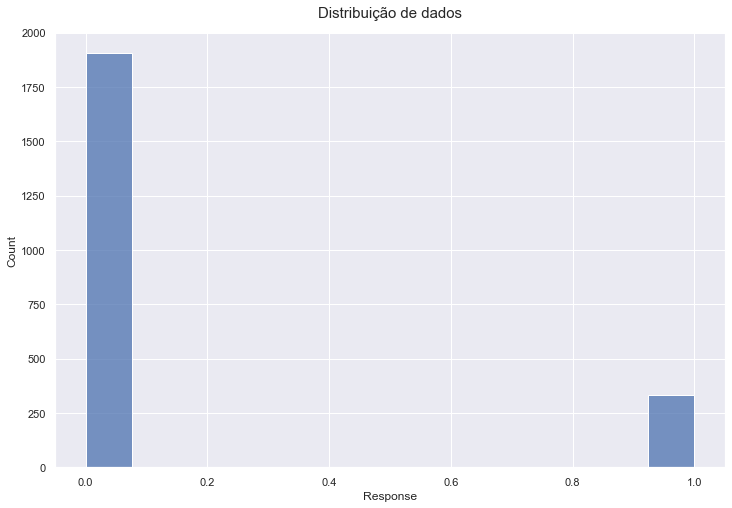

In [213]:
sns.histplot(data['Response'])
plt.title('Distribuição de dados',size=15,pad=15);

Notamos que apenas 334 pessoas o equivalente a 14,91% dos consumidores aceitaram a oferta na última campanha. 

### 1.7.2 Atributos Categóricos

In [214]:
# Verificar a quantidade de itens únicos em cada variável categórica
cat_attributes.apply(lambda x: x.unique().shape[0])

Education          5
Marital_Status     8
Country            8
Weekday            7
Month             12
dtype: int64

## 2. Mapa Mental de Hipóteses

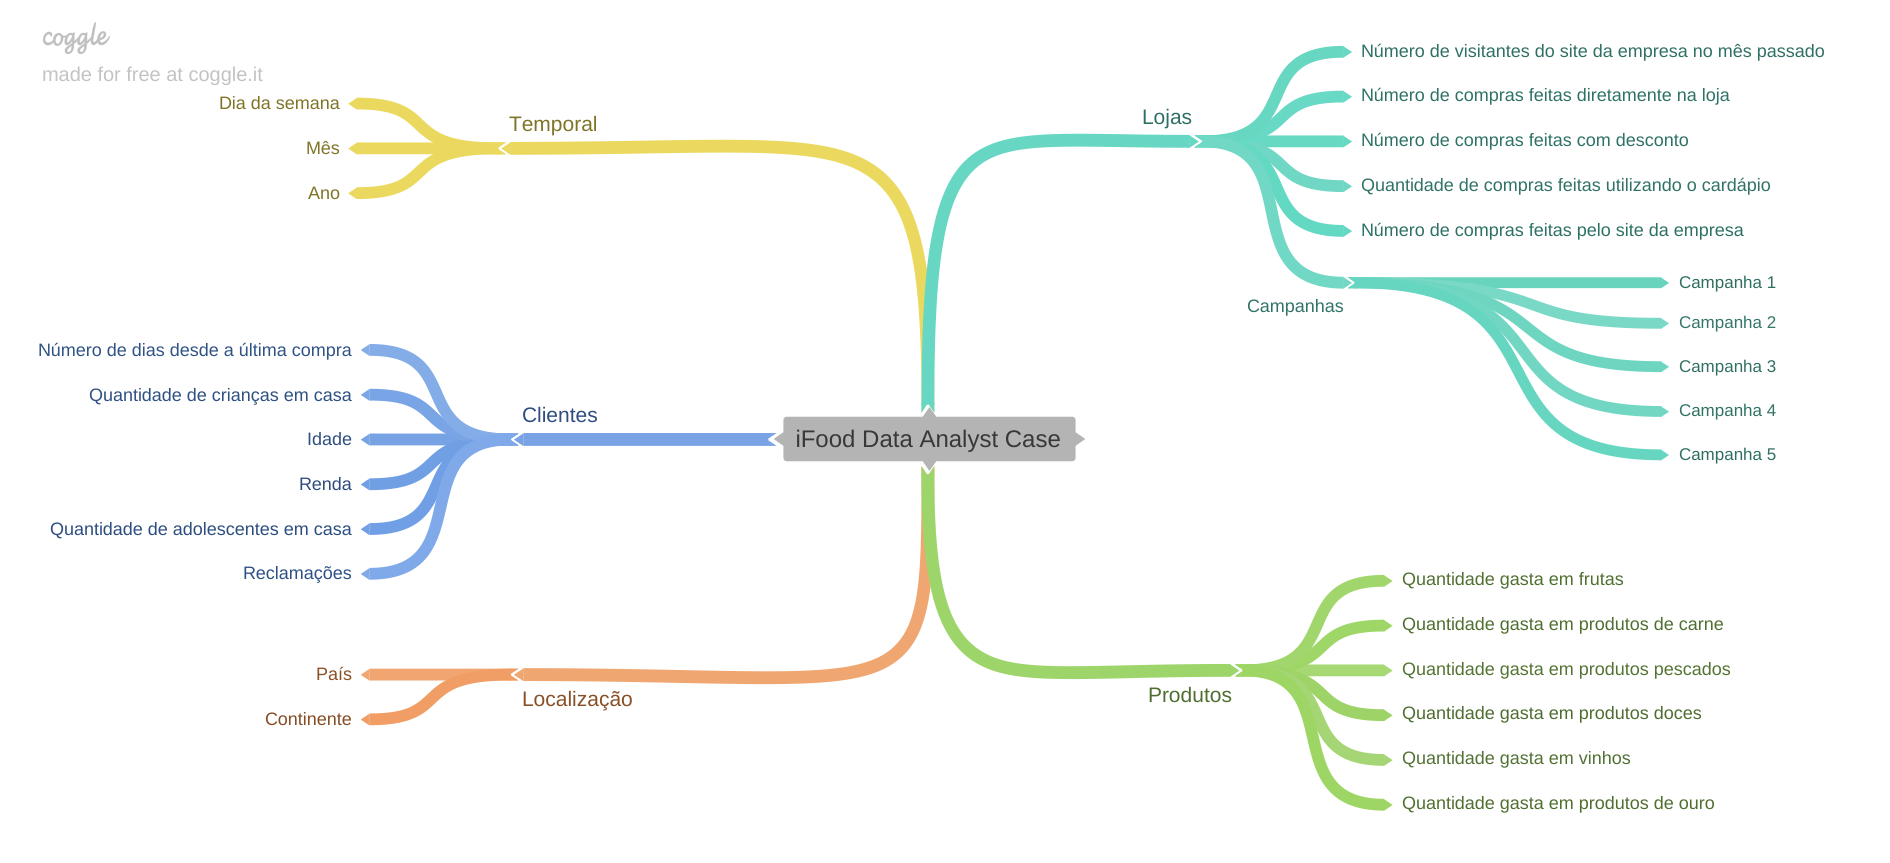

In [215]:
Image('images\iFood_Data_Analyst_Case_hypotesis.png')

### 2.1 Criação de Hipóteses

#### 2.1.1 Hipóteses Temporais

* O dia da semana que o cliente se vinculou à empresa possui alguma relação com a aceptibilidade à última campanha?
* O mês que o cliente se vinculou à empresa possui alguma relação com a aceptibilidade à última campanha?
* O ano que o cliente se vinculou à empresa possui alguma relação com a aceptibilidade à última campanha?

#### 2.1.2 Hipóteses Lojas

* O número de visitantes no site da empresa no mês passado influencia a adesão à última campanha?
* O número de compras feitas diretamente na loja influencia a adesão à última campanha?
* O número de compras feitas com desconto influencia a adesão à última campanha?
* A quantidade de compras feitas utilizando o cardápio influencia a adesão à última campanha?
* A adesão à campanha 1 deveria impactar o aumento na adesão à última campanha; 
* A adesão à campanha 2 deveria impactar o aumento na adesão à última campanha; 
* A adesão à campanha 3 deveria impactar o aumento na adesão à última campanha; 
* A adesão à campanha 4 deveria impactar o aumento na adesão à última campanha; 
* A adesão à campanha 5 deveria impactar o aumento na adesão à última campanha; 

#### 2.1.3 Hipóteses Clientes

* Clientes com o número de dias desde a última compra do cliente deveriam ser mais aceptíveis à última campanha;
* Ter mais crianças em casa influencia na receptividade à última campanha?
* A idade do cliente influencia na receptividade à última campanha?
* A renda do cliente influencia na aceptibilidade à última campanha?
* Ter mais adolescentes em casa influencia na aceptibilidade à ultima campanha?

#### 2.1.4 Hipóteses Localização
* Algum dos países teve melhor receptibilidade à última campanha do que os demais?
* Algum continente teve melhor receptibilidade à última campanha do que os demais?

#### 2.1.5 Hipóteses Produtos
* A quantidade gasta em frutas influencia na aceptibilidade à última campanha?
* A quantidade gasta em produtos de carne influencia na aceptibilidade à última campanha?
* A quantidade gasta em produtos pescados influencia na aceptibilidade à última campanha?
* A quantidade gasta em produtos doces influencia na aceptibilidade à última campanha?
* A quantidade gasta em vinhos influencia na aceptibilidade à última campanha?
* A quantidade gasta em produtos de ouro influencia na aceptibilidade à última campanha?

### 2.2 KDE Plots

Nesta seção serão apresentados KDE Plots. Através destes gráficos podemos obter alguns insights acerca da distribuição dos dados de cada uma das variáveis avaliadas. A lista contendo estas variáveis está disponível a seguir:

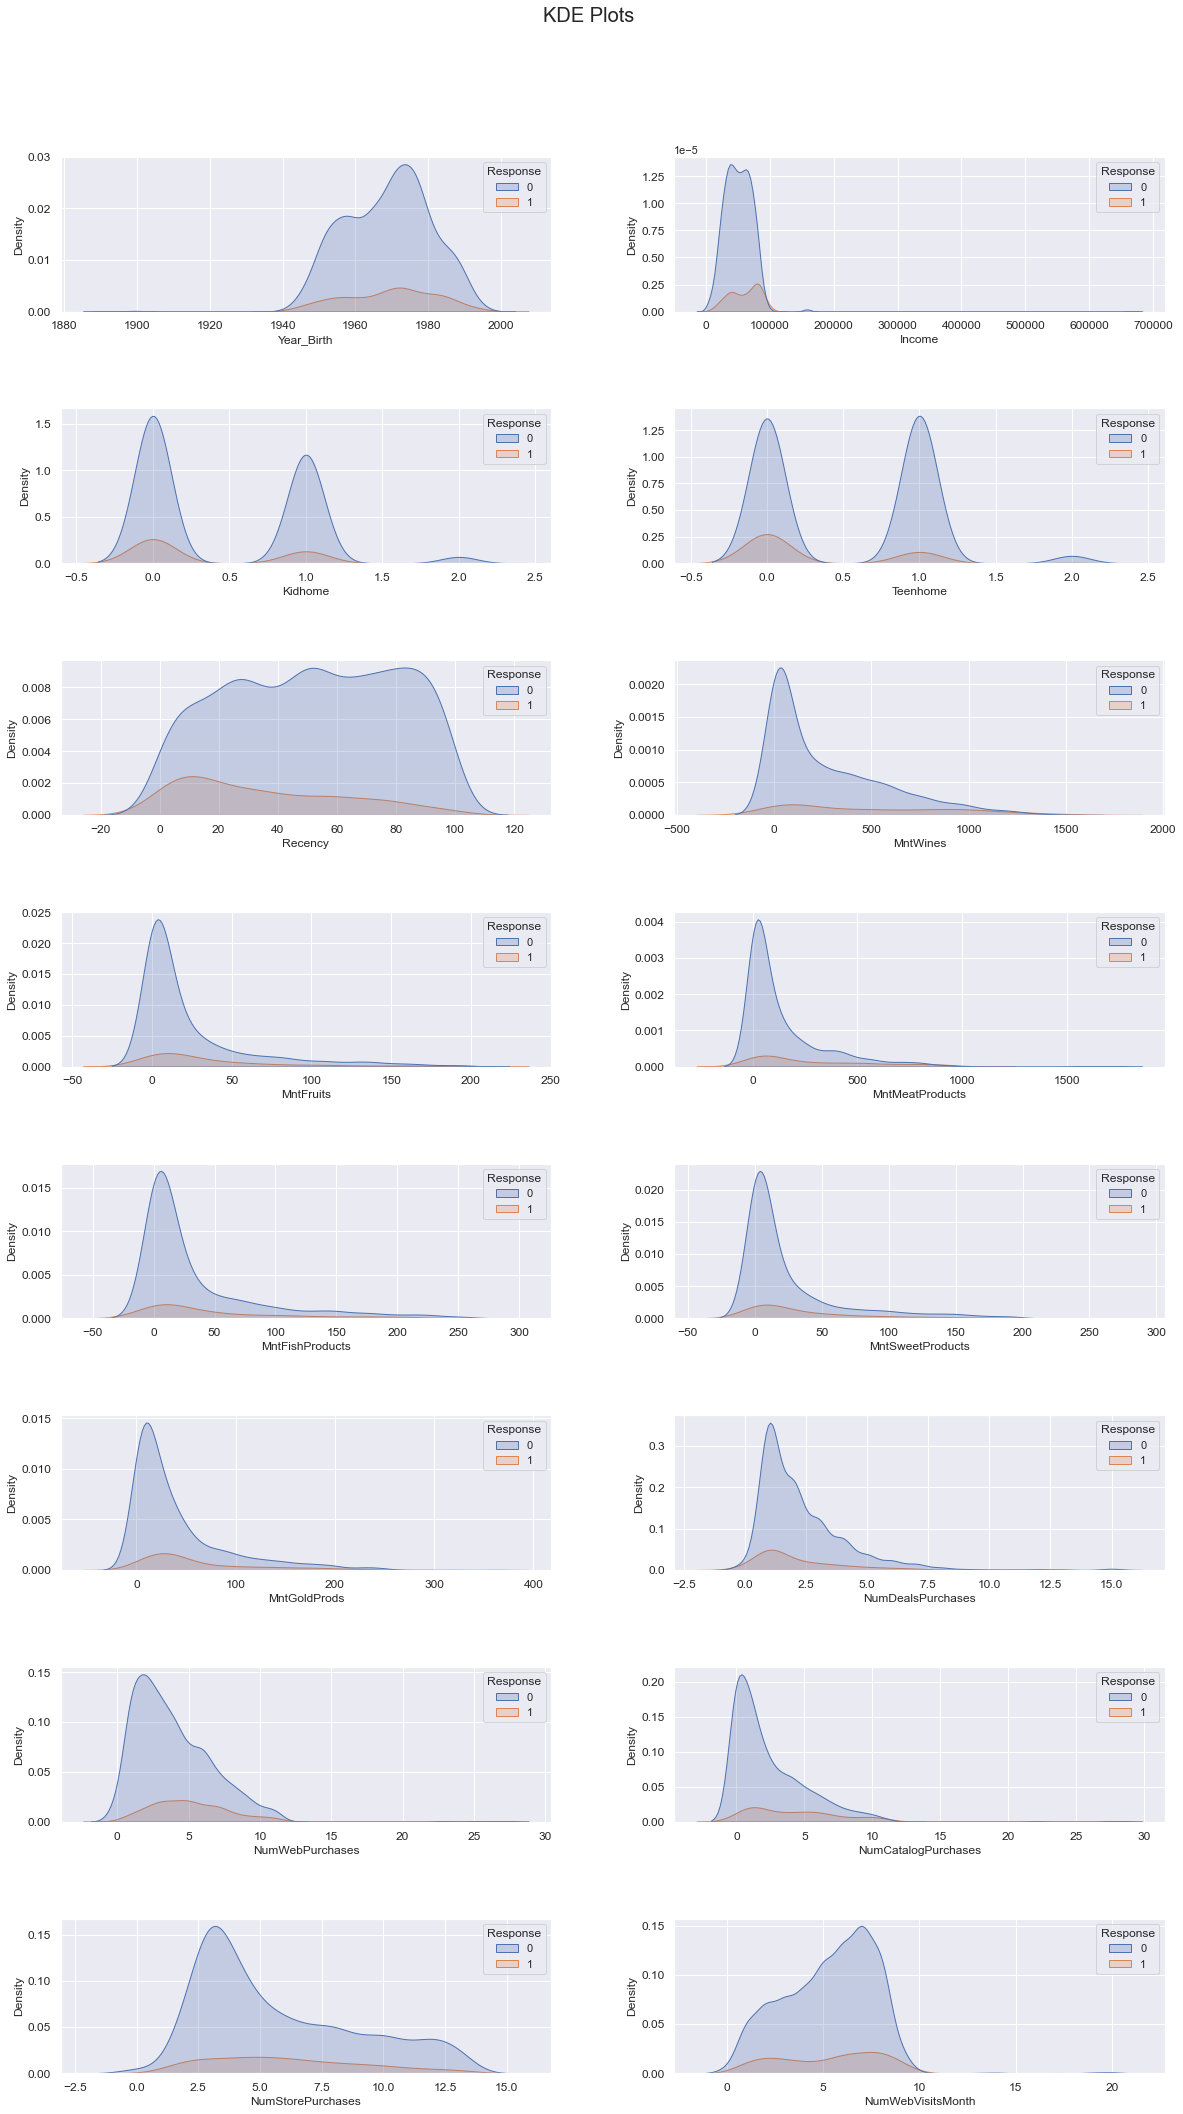

In [217]:
# Lista de features escolhidas para as próximas análises
list_features = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
                  'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                  'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
                  'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                  'NumWebVisitsMonth']
# KDE plot 
plot_kde(list_features,data)

As regiões sombreadas em azul e laranja representam respectivamente as distribuições de cada uma das variáveis para pessoas que **não aceitaram** a oferta da última campanha (Response = 0) e pessoas que **aceitaram** a oferta da última campanha (Response = 1).

Através destes gráficos, identificamos que:

* A maioria dos consumidores, tanto os que aceitaram a última campanha como os que não aceitaram, possuem uma faixa etária muito próxima;
* As pessoas que aceitaram a última campanha possuem renda maior que as pessoas que não aceitaram;
* Os consumidores que não têm criança ou adolescente em casa foram mais receptivos à última campanha comparado aos que têm;
* 

### 2.3 Boxplot

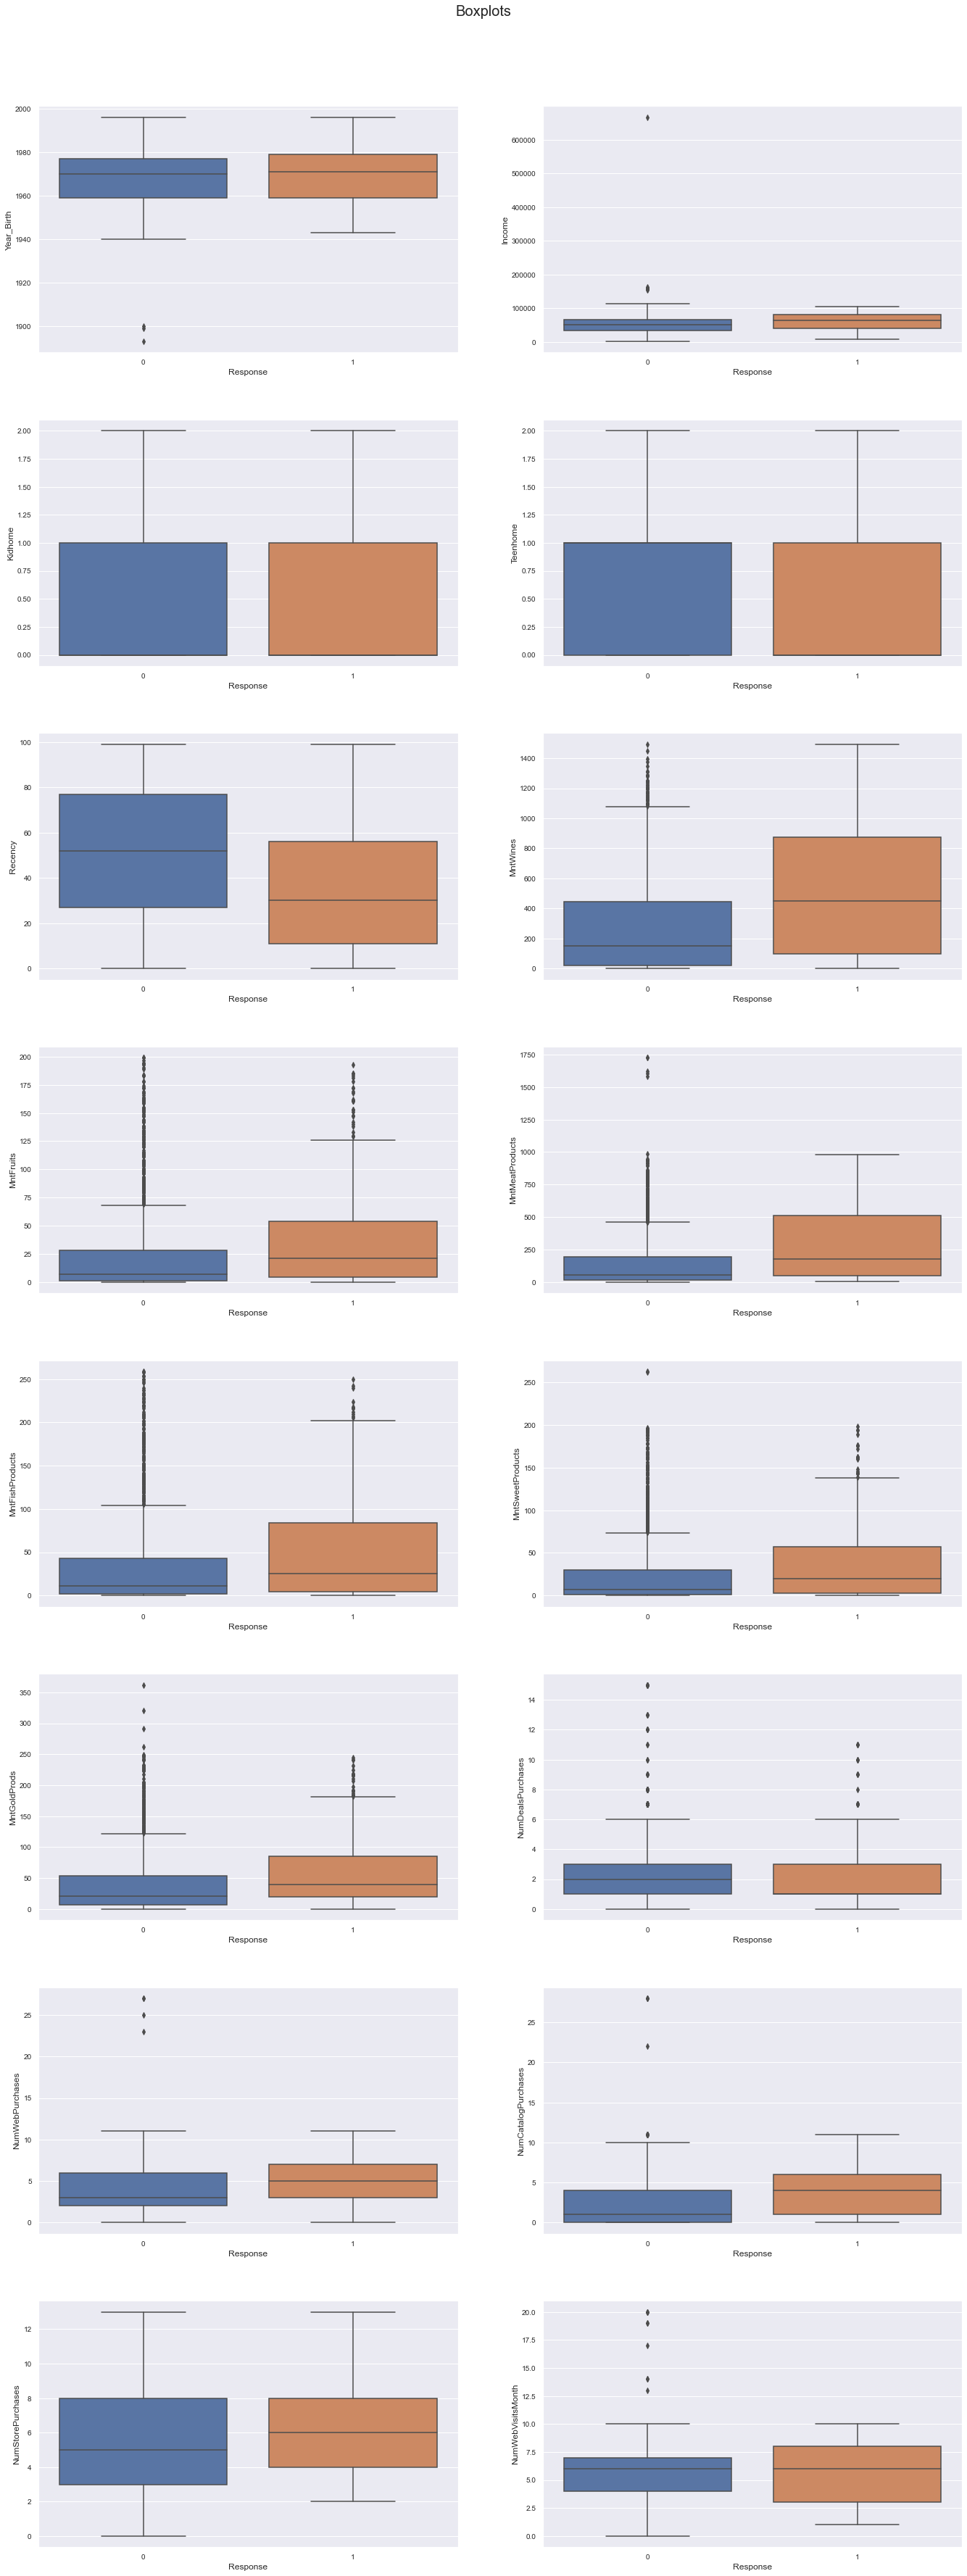

In [218]:
# Boxplot
plot_boxplot(list_features,data)

#### Educação

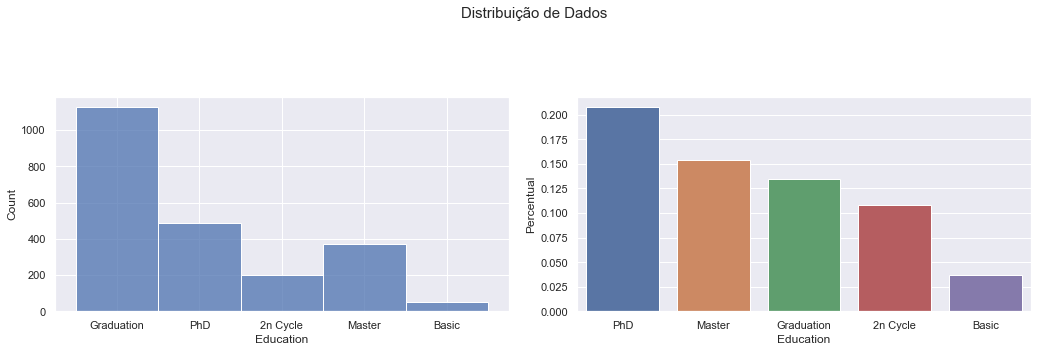

In [219]:
# Gráfico para visualizar a distribuição dos dados para a variável Education
categorical_distribution_plot(data,'Education')

No gráfico à esquerda, podemos notar o histograma da variável `Education` enquanto no gráfico à direita, notamos o percentual de consumidores que aceitaram a oferta na última campanha agrupadas por categoria (PhD, Master, Graduation, 2n Cycle e Basic). 

Verificamos que:
* 50,31% dos consumidores possuem Graduação;
* 21,70% dos consumidores possuem PhD;
* 16,52% dos consumidores possuem Mestrado.

Além disso:
* As categorias que apresentaram maior aceitabilidade à última campanha foram: PhD e Master;
* 20,78% dos consumidores que possuem PhD aceitaram à oferta na última campanha;
* 15,40% dos consumidores que possuem Mestrado aceitaram à oferta na última campanha;
* 13,49% dos consumidores que possuem Graduação aceitaram à oferta na última campanha.

#### Estado Civil

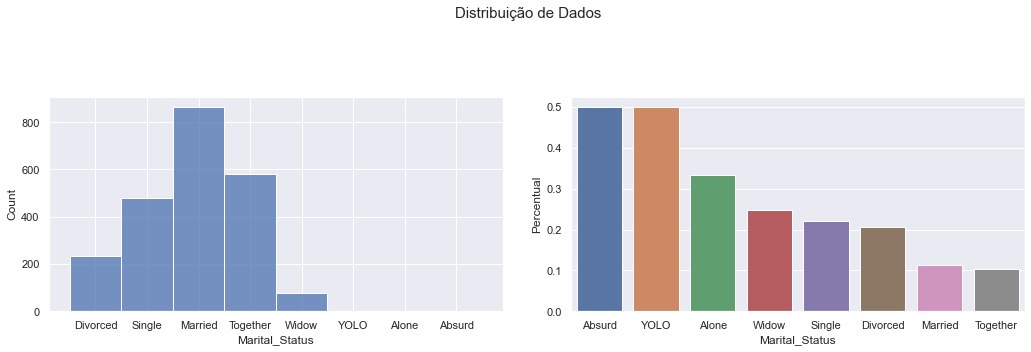

In [220]:
# Gráfico para visualizar a distribuição dos dados para a variável Marital_Status
categorical_distribution_plot(data,'Marital_Status')

No gráfico à esquerda, podemos notar o histograma da variável `Marital_Status` enquanto no gráfico à direita, notamos o percentual de consumidores que aceitaram a oferta na última campanha agrupadas por categoria (Absurd, YOLO, Alone, Widow, Single, Divorced, Married e Together). 

Verificamos que:
* 38,57% dos consumidores são casados;
* 25,89% dos consumidores vivem juntos com seus parceiros;
* 21,43% dos consumidores são solteiros.

Além disso:
* As categorias que apresentaram maior aceitabilidade à última campanha foram: Absurd e YOLO. Essas categorias tiveram o mesmo percentual (50%);
* 33,33% dos consumidores que são solteiros aceitaram à oferta na última campanha;
* 24,68% dos consumidores que são viúvos aceitaram à oferta na última campanha.

#### País

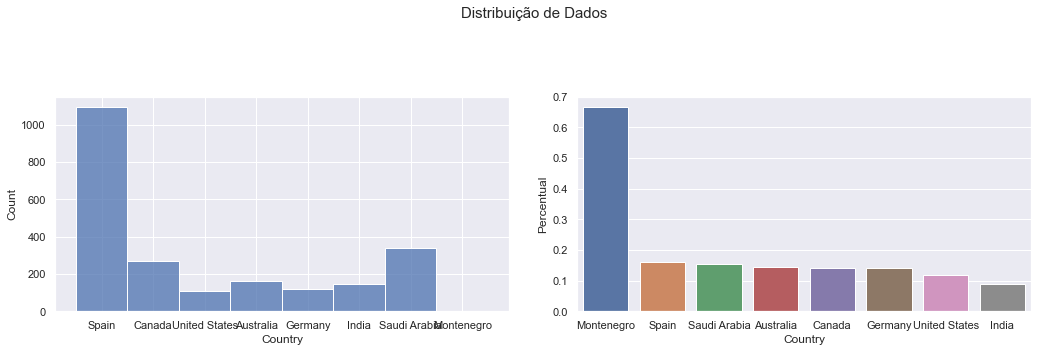

In [221]:
# Gráfico para visualizar a distribuição dos dados para a variável Country
categorical_distribution_plot(data,'Country')

No gráfico à esquerda, podemos notar o histograma da variável `Country` enquanto no gráfico à direita, notamos o percentual de consumidores que aceitaram a oferta na última campanha agrupadas por categoria (ME, SP, SA, AUS, CA, GER, US e IND). 

Verificamos que:
* 38,57% dos consumidores são casados;
* 25,89% dos consumidores vivem juntos com seus parceiros;
* 21,43% dos consumidores são solteiros.

Além disso:
* O país que apresentou disparadamente maior aceitabilidade à última campanha foi: ME. 66,67% dos consumidores pertencentes a ME (Montenegro) aderiram a esta campanha;
* 16,07% dos consumidores pertencentes à SP (Espanha) aceitaram à oferta na última campanha;
* 15,43% dos consumidores pertencentes à SA (Árabia Saudita) aceitaram à oferta na última campanha.

### Correlação

O coeficiente de correlação de Pearson avalia o grau e a direção da correlação linear entre duas variáveis. Deste modo, quanto mais próximos de 1 ou -1, maior a intensidade da correlação, o sinal indica apenas a direção (positivamente correlacionados ou negativamente correlacionados). Deve-se mencionar também que quanto mais próximo de 0 menor a força da correlação.

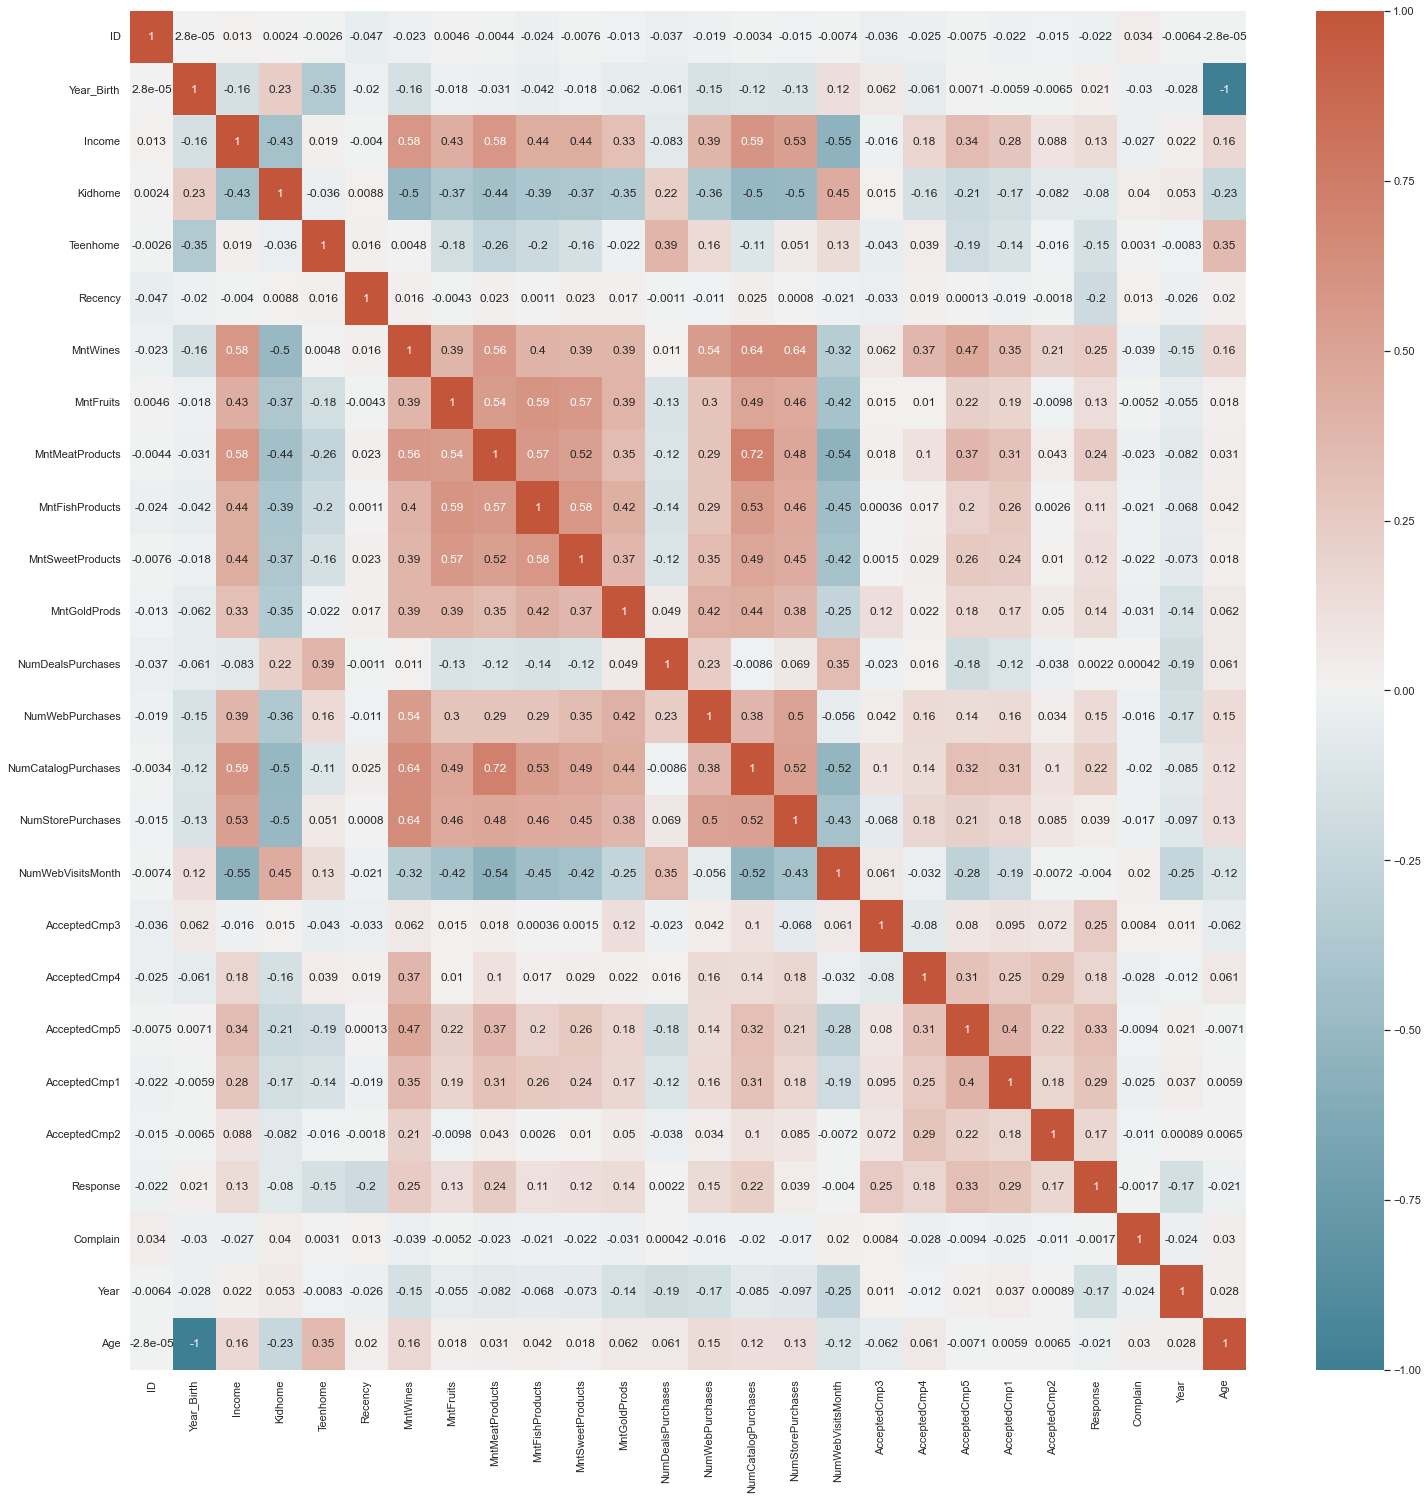

In [222]:
plt.figure(figsize=(25,25))
corr_data = data.corr()
sns.heatmap(corr_data,xticklabels=corr_data.columns,yticklabels=corr_data.columns,annot=True,cmap=sns.diverging_palette(220,20, as_cmap=True));

Podemos identificar que as variáveis que apresentaram maior correlação linear com a variável `Response` foram: `AcceptedCmp1`, `AcceptedCmp5`, `AcceptedCmp3` e `MntWines`. Dessa forma, interpretamos que altos valores de `Response` são acompanhados por altos valores destas variáveis: `AcceptedCmp1`, `AcceptedCmp5`, `AcceptedCmp3` e `MntWines`. Isso pois as correlações entre a variável `Response` e as demais variáveis mencionadas são positivas.
Além disso, deve-se destacar que altos valores de `Response` são acompanhados por baixos valores de `Recency`.

